In [1]:
in_colab = 'google.colab' in str(get_ipython())
if in_colab == True:
  !pip install yfinance
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
  from sklearn.kernel_ridge import KernelRidge
else:
  import yfinance as yf
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  import matplotlib.pyplot as plt
  from sklearn.kernel_ridge import KernelRidge

In [11]:
crypto_btc = yf.download(tickers='BTC-USD', start='2018-01-01', end='2022-12-31').drop(columns=['High', 'Low']).round(2).reset_index()
crypto_eth = yf.download(tickers='ETH-USD', start='2018-01-01', end='2022-12-31').round(2).reset_index()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#crypto_btc['Percent Change'] = crypto_btc['Close'].pct_change()
#crypto_eth['Percent Change'] = crypto_eth['Close'].pct_change()

In [ ]:
crypto_btc.plot(
    x = 'Date',
    y = 'Close',
    grid = True,
    figsize = (20,10)
)

In [ ]:
crypto_btc.head()

In [ ]:
X = crypto_btc.drop(columns=['Date'])
X

In [ ]:
y = crypto_btc[['Close']]
y

In [19]:
df = ()

def kernel_predict(df_pred):
    X = df.drop(columns=['Date'])
    y = df[['Close']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=42)
    kr = KernelRidge(kernel= 'linear', alpha = 50e-2, degree = 1000)
    kr.fit(X_train, y_train)
    predict = kr.predict(X)
    df_pred = df.copy().drop(columns=['Open','Volume']).rename(columns={'Close':'Actual Price'})
    df_pred['Predicted Price'] = predict
    df_pred['Price Accuracy']= (df_pred['Predicted Price']/df_pred['Actual Price']-1)*100
    return df_pred


In [20]:
df = crypto_btc
btc_predict=pd.DataFrame(kernel_predict(df))
btc_predict['Price Accuracy'].describe()

/Users/playb3yond40gb/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


count    1825.000000
mean        0.238326
std         0.164405
min        -0.767075
25%         0.152970
50%         0.223990
75%         0.319783
max         2.036095
Name: Price Accuracy, dtype: float64

In [21]:
df = crypto_eth
eth_predict=pd.DataFrame(kernel_predict(df))
eth_predict['Price Accuracy'].describe()

/Users/playb3yond40gb/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  "Singular matrix in solving dual problem. Using "


count    1825.000000
mean        0.299175
std         2.125722
min        -7.701270
25%        -0.863598
50%         0.234261
75%         1.223330
max        30.396084
Name: Price Accuracy, dtype: float64

In [ ]:
from sklearn.kernel_ridge import KernelRidge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80, random_state=42)
kr = KernelRidge(kernel= 'linear', alpha = 50e-2, degree = 100)
kr.fit(X_train, y_train)
pred_btc = kr.predict(X)
btc_pred = crypto_btc.copy().drop(columns=['Open','Volume']).rename(columns={'Close':'Actual Price'})
btc_pred['BTC Predicted Price'] = pred_btc
btc_pred['Price Accuracy']= (btc_pred['BTC Predicted Price']/btc_pred['Actual Price']-1)*100
btc_pred

In [16]:

btc_predict['Price Accuracy'].describe()

count    1825.000000
mean        0.238326
std         0.164405
min        -0.767075
25%         0.152970
50%         0.223990
75%         0.319783
max         2.036095
Name: Price Accuracy, dtype: float64

<AxesSubplot:xlabel='Date'>

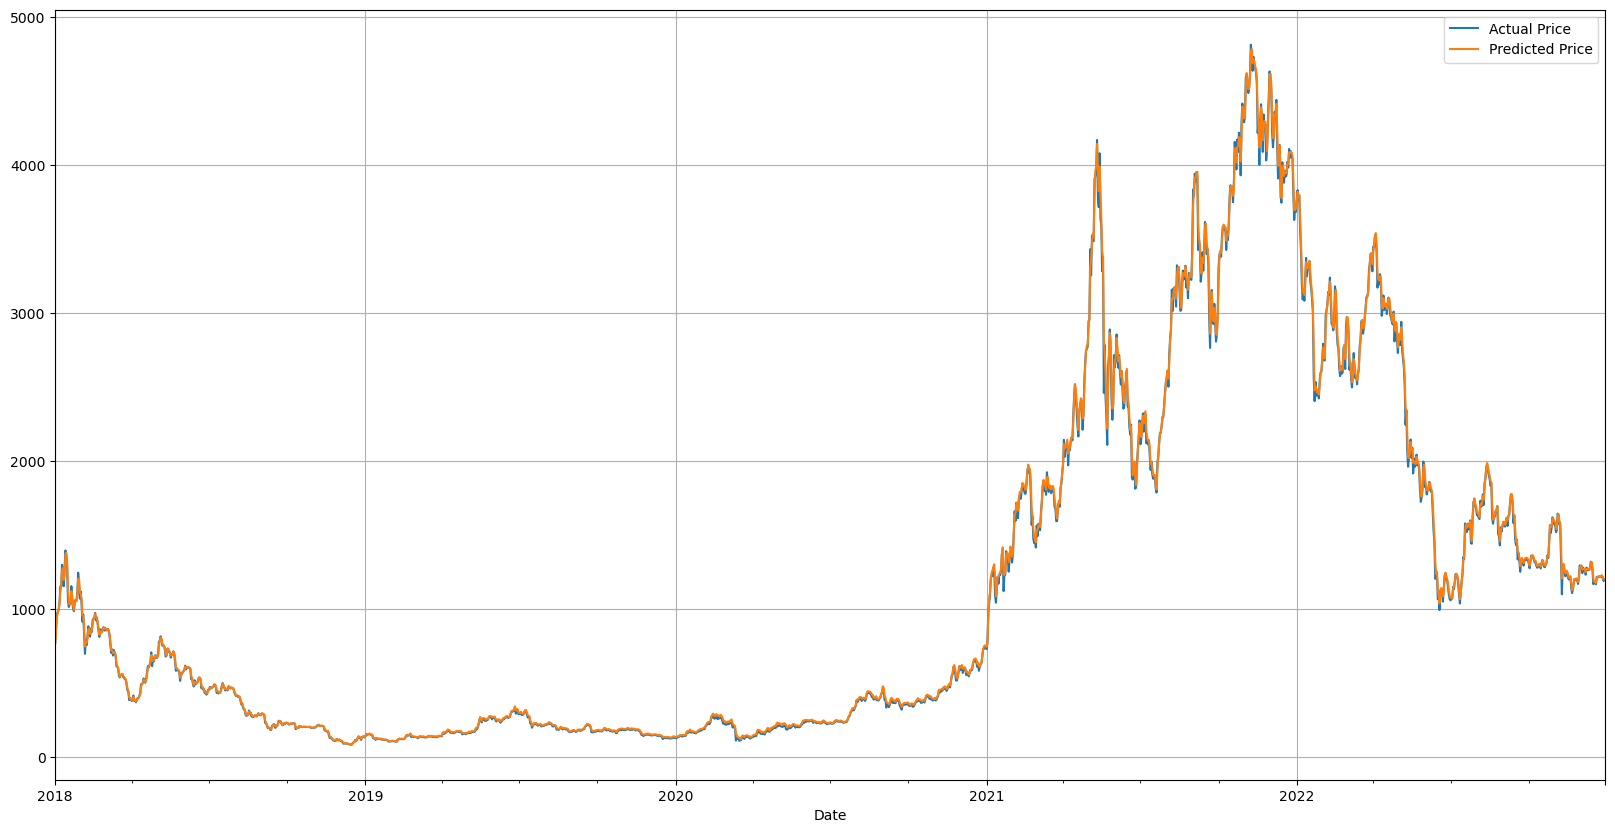

In [10]:
btc_predict.plot(
    x='Date',
    y=['Actual Price','Predicted Price' ],
    grid = True,
    figsize=(20,10)
)